In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [4]:
REBUILD_DATA = False

class Currency():
    IMG_SIZE = 250
    BACK = "C:/Users/Aayush/Desktop/Fake-Currency-Detection/Datasets/back"
    FRONT = "C:/Users/Aayush/Desktop/Fake-Currency-Detection/Datasets/front"
    LABELS = {BACK: 0, FRONT: 1}
    training_data = []
    backcount = 0
    frontcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])


                    if label == self.FRONT:
                        self.frontcount += 1
                    elif label == self.BACK:
                        self.backcount += 1
                except Exception as e:
                    pass
                    #print(str(e))
        
            
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print('Front:', self.frontcount)
        print('Back:', self.backcount)
    
if  REBUILD_DATA:
    currency = Currency()
    currency.make_training_data()
                           

In [5]:
training_data = np.load("training_data.npy", allow_pickle=True)


In [6]:
print(len(training_data))

1030


In [7]:
print(training_data[1])

[array([[230, 226, 225, ..., 222, 245, 253],
       [226, 144, 151, ..., 250, 242, 250],
       [140, 142, 131, ..., 232, 234, 244],
       ...,
       [ 63,  46,  47, ...,  28,  30,  31],
       [ 67,  45,  70, ...,  47,  33,  28],
       [ 72,  63,  72, ...,  34,  29,  35]], dtype=uint8)
 array([0., 1.])]


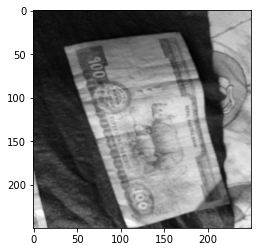

In [9]:
import matplotlib.pyplot as plt

plt.imshow(training_data[10][0], cmap="gray")
plt.show()

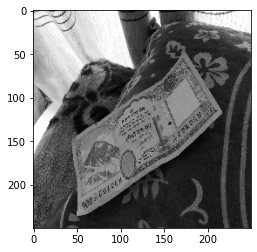

In [10]:
plt.imshow(training_data[1][0], cmap="gray")
plt.show()

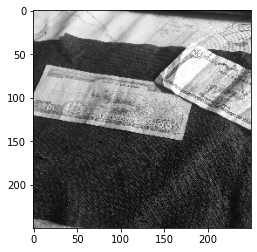

In [14]:
plt.imshow(training_data[5][0], cmap="gray")
plt.show()